<a href="https://colab.research.google.com/github/oscarvel821/data_science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c digit-recognizer

 39% 6.00M/15.3M [00:00<00:00, 54.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 100MB/s] 


In [7]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#Digit dataset

In [8]:
raw_df = pd.read_csv('/content/train.csv')

In [9]:
raw_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


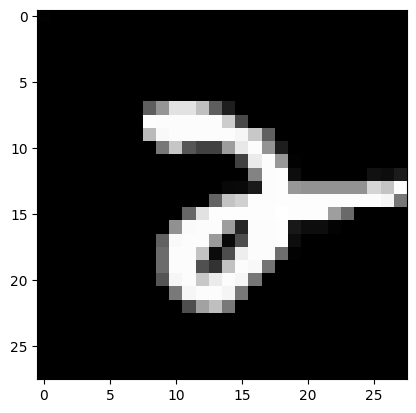

In [10]:
# pick a sample to plot
sample = 34
image = raw_df.iloc[sample].values[0:-1]
# plot the sample
fig = plt.figure
plt.imshow(image.reshape(28,28), cmap='gray')
plt.show()

In [11]:
images = []
labels = []
nums = 10
for i in range(nums):
  label = raw_df.iloc[i].values[0]
  img = raw_df.iloc[i].values[0:-1]
  labels.append(label)
  images.append(img.reshape(28,28))

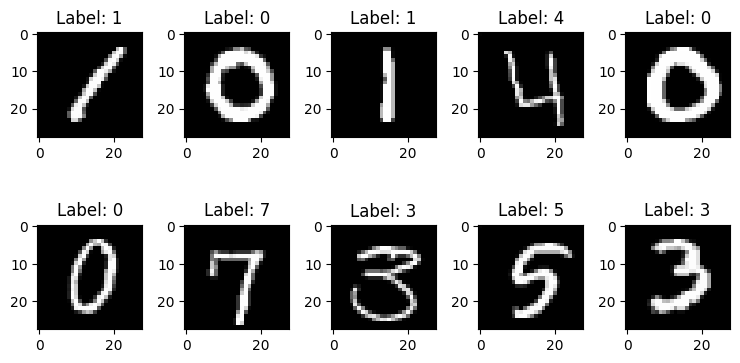

In [12]:
num_col = 5
num_row = 2

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [13]:
y = raw_df['label'].to_numpy()

In [14]:
xi = ((raw_df.drop(['label'], axis=1)).iloc[0:42000]).to_numpy()

In [15]:
x_train, x_val, y_train, y_val = train_test_split(xi, y, test_size=0.25, random_state=12)

# Logistic Regression

In [21]:
class LogisticRegression:
  def __init__(self, initial_params, class_of_interest=0):
    self.params = initial_params
    self.class_of_interest = class_of_interest

  @staticmethod
  def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

  @staticmethod
  def normalize(X):
    return X / 255

  def learning_rate(self, t):
    return self.params['t0'] / (t + self.params['t1'])

  # Method to make predictions
  def predict(self, x):
    w_0 = self.params['weights']
    b_0 = self.params['bias']
    z = np.dot(x, w_0) + b_0
    return self.sigmoid(z)

  def loss(self, y_true, y_hat):
    error = (-y_true * np.log(y_hat) - (1 - y_true) * np.log(1 - y_hat)).mean()
    return error

  # Method to train the model - (mini-batch implementation)
  def train(self, X, y, eta=0.05, momentum=0.0, epochs=50, batch_size=100):

    M, n = X.shape

    x = self.normalize(X)

    y = [1 if i == self.class_of_interest else 0 for i in y]
    y = np.array(y)

    hist = []

    weights_change = np.zeros(n)
    bias_change = 0

    for epoch in range(epochs):
      print(f"epoch: {epoch + 1}/{epochs}")
      shuffled_indices = np.random.permutation(M)
      X_shuffled = x[shuffled_indices]
      y_shuffled = y[shuffled_indices]

      for i in range((M-1)//batch_size + 1):

        start_i = i * batch_size
        end_i = start_i + batch_size

        # print(f"batch {start_i} - {end_i}")

        xi = X_shuffled[start_i:end_i]
        yi = y_shuffled[start_i: end_i]

        y_hat = self.predict(xi)

        dw = (xi.T @ (y_hat - yi)) / batch_size # Derivative of loss wrt w
        db = (y_hat - yi).mean() # Derivative of loss wrt b

        # self.eta = self.learning_rate(epoch*((M-1)//batch_size + 1) + i)

        # Update w and b
        weights_diff = dw * eta + momentum * weights_change
        bias_diff = db * eta + momentum * bias_change

        self.params['weights'] = self.params['weights'] - weights_diff
        self.params['bias'] = self.params['bias'] - bias_diff

        weights_change = weights_diff
        bias_change = bias_diff

        hist.append(self.loss(yi, y_hat))

      print(f'loss : {hist[-1]}')

    return hist

  def prediction(self, X):

    x = self.normalize(X)

    preds = self.predict(x)

    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

  def accuracy(self, y, y_hat):

    y = [1 if i == self.class_of_interest else 0 for i in y]
    y = np.array(y)

    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

#One vs All

In [24]:
models = []

weights = np.zeros(x_train.shape[1])
bias = 0

for i in range(10):
  params = {'weights': weights,
            'bias' : bias}

  models.append(LogisticRegression(params, i))

In [25]:
history = []

for i in range(10):
  print(f'class of interest {i}')
  hist = models[i].train(x_train, y_train, 0.01, 0.9, 40, 100)
  print("")
  history.append(hist)

class of interest 0
epoch: 1/40
loss : 0.03202005683670821
epoch: 2/40
loss : 0.052253666870590985
epoch: 3/40
loss : 0.04888444987845389
epoch: 4/40
loss : 0.037025384307409016
epoch: 5/40
loss : 0.007351310494775331
epoch: 6/40
loss : 0.016508303769368876
epoch: 7/40
loss : 0.042958718768215026
epoch: 8/40
loss : 0.0518151588404358
epoch: 9/40
loss : 0.07499900071396062
epoch: 10/40
loss : 0.03756303420692239
epoch: 11/40
loss : 0.08767031599002624
epoch: 12/40
loss : 0.00832312815906294
epoch: 13/40
loss : 0.031052130744046464
epoch: 14/40
loss : 0.12907164515367708
epoch: 15/40
loss : 0.06319346686116108
epoch: 16/40
loss : 0.021771273761685063
epoch: 17/40
loss : 0.0799714521403681
epoch: 18/40
loss : 0.08154458428818721
epoch: 19/40
loss : 0.024079291873096126
epoch: 20/40
loss : 0.015297255410562358
epoch: 21/40
loss : 0.01247374462765252
epoch: 22/40
loss : 0.026117609539714568
epoch: 23/40
loss : 0.012747195022131588
epoch: 24/40
loss : 0.006071570894929796
epoch: 25/40
loss :

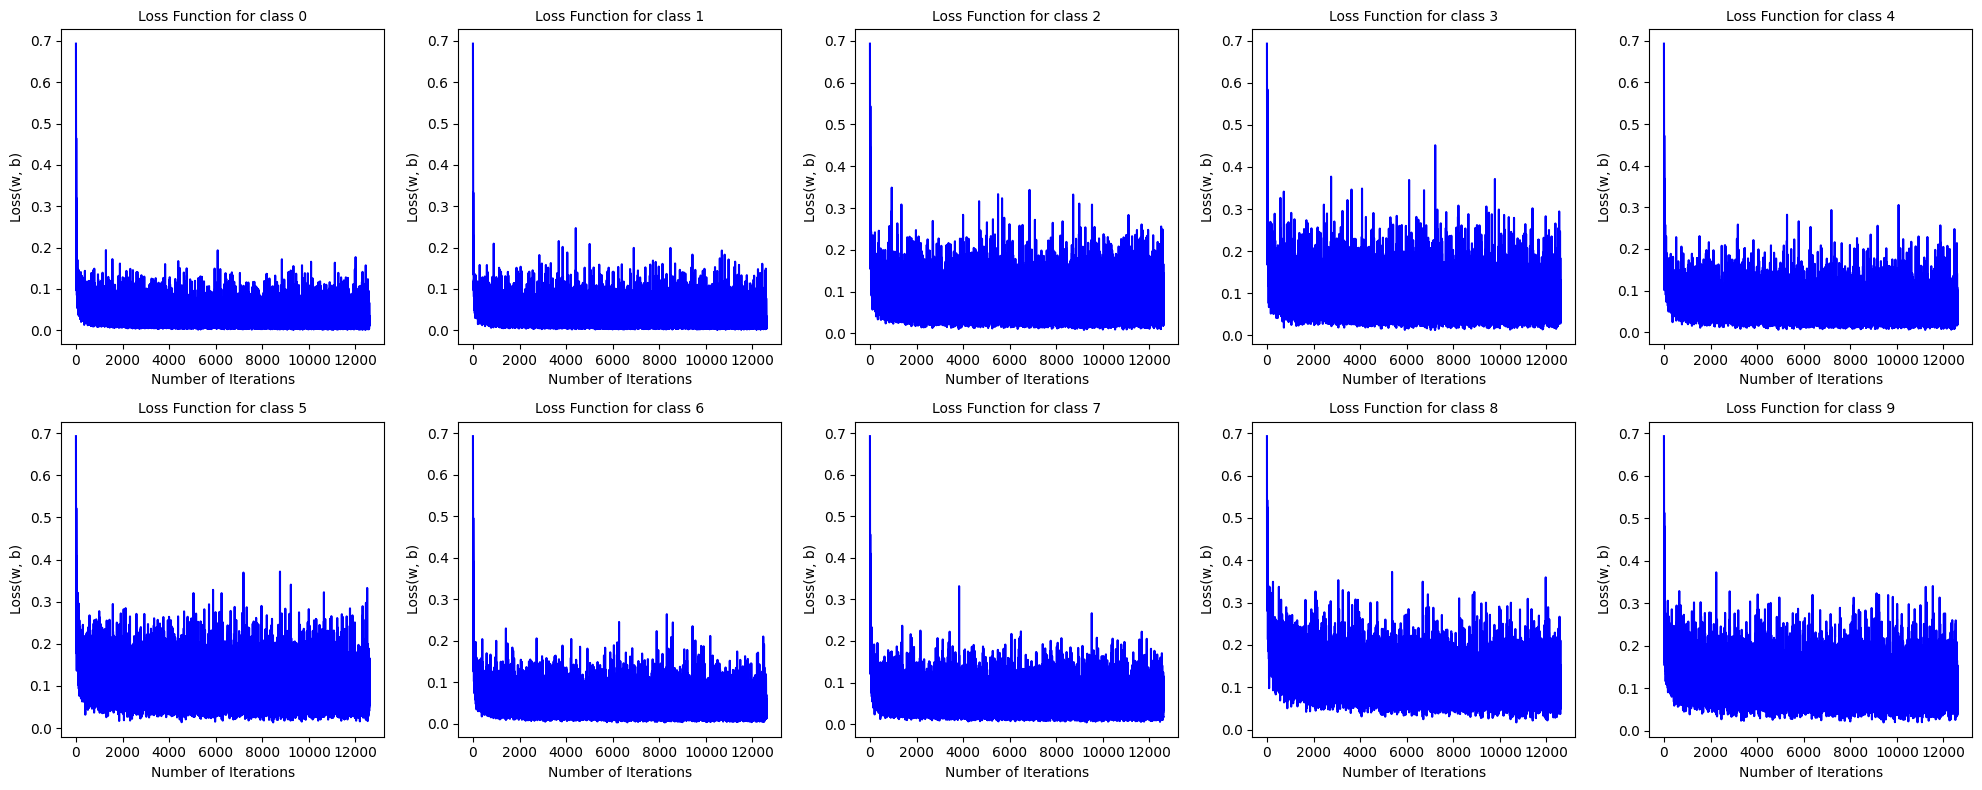

In [26]:
num_col = 5
num_row = 2
nums = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(nums):
    ax = axes[i//num_col, i%num_col]
    ax.plot(history[i], 'b')
    ax.set_title(f'Loss Function for class {i}', fontsize='10')
    ax.set_xlabel('Number of Iterations', fontsize='10')
    ax.set_ylabel(r'Loss(w, b)', fontsize='10')
plt.tight_layout()
plt.show()

In [27]:
print("One vs All\n")

for i in range(len(models)):
  y_hat = models[i].prediction(x_val)
  accuracy = models[i].accuracy(y_val, y_hat)
  print(f'Dataset for class {i}')
  print(f'accuracy - {accuracy}\n')

One vs All

Dataset for class 0
accuracy - 0.9909523809523809

Dataset for class 1
accuracy - 0.991904761904762

Dataset for class 2
accuracy - 0.9796190476190476

Dataset for class 3
accuracy - 0.9738095238095238

Dataset for class 4
accuracy - 0.9818095238095238

Dataset for class 5
accuracy - 0.9678095238095238

Dataset for class 6
accuracy - 0.9885714285714285

Dataset for class 7
accuracy - 0.9855238095238095

Dataset for class 8
accuracy - 0.9574285714285714

Dataset for class 9
accuracy - 0.962952380952381



In [28]:
from sklearn.metrics import confusion_matrix
cms = []

print("One vs All\n")

for i in range(len(models)):
  y_temp = [1 if j == i  else 0 for j in y_val]
  y_temp = np.array(y_temp)

  y_hat = models[i].prediction(x_val)

  cm = confusion_matrix(y_temp, y_hat)
  cms.append(cm)
  print(f'Confusion Matrix for dataset {i}')
  print(f'{cm}\n')

One vs All

Confusion Matrix for dataset 0
[[9390   51]
 [  44 1015]]

Confusion Matrix for dataset 1
[[9280   46]
 [  39 1135]]

Confusion Matrix for dataset 2
[[9438   54]
 [ 160  848]]

Confusion Matrix for dataset 3
[[9300   77]
 [ 198  925]]

Confusion Matrix for dataset 4
[[9425   87]
 [ 104  884]]

Confusion Matrix for dataset 5
[[9467   80]
 [ 258  695]]

Confusion Matrix for dataset 6
[[9401   48]
 [  72  979]]

Confusion Matrix for dataset 7
[[9362   61]
 [  91  986]]

Confusion Matrix for dataset 8
[[9380  110]
 [ 337  673]]

Confusion Matrix for dataset 9
[[9312  131]
 [ 258  799]]



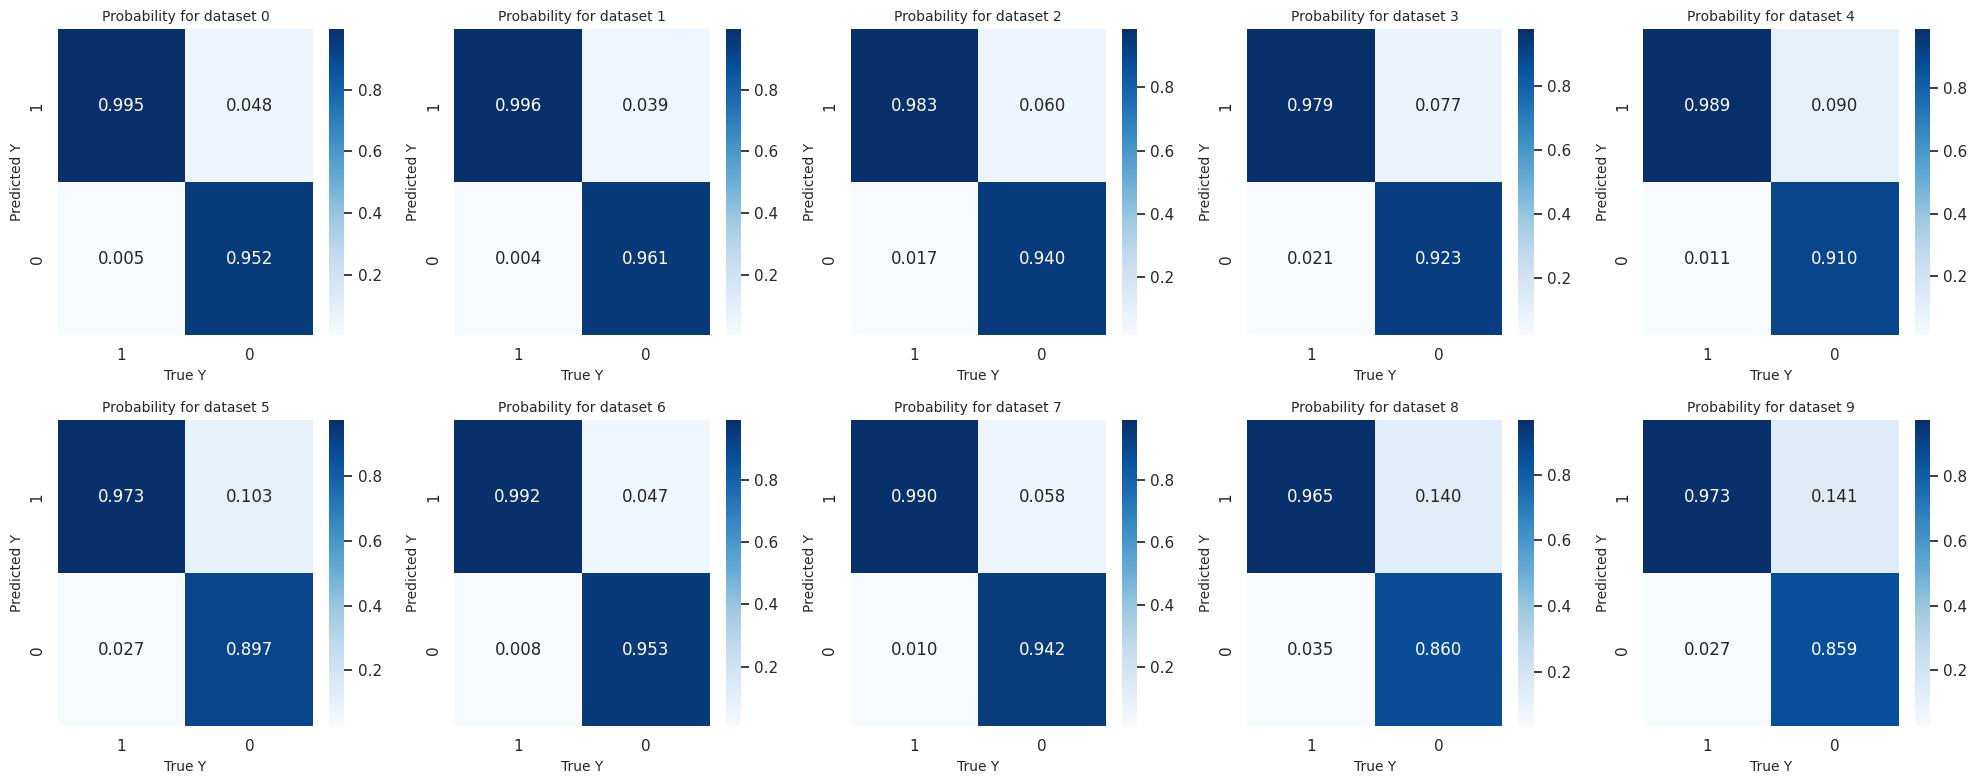

In [29]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(nums):

  cm = cms[i]

  temp = np.tile((np.sum(cm, axis=0)), (2,1))

  ax = axes[i//num_col, i%num_col]
  sns.heatmap(np.round((cm / temp), 3), annot=True, ax=ax, xticklabels=[1,0], yticklabels=[1,0], fmt=".3f", cmap='Blues')
  # ax.plot(history[i], 'b')
  ax.set_title(f'Probability for dataset {i}', fontsize='10')
  ax.set_xlabel('True Y', fontsize='10')
  ax.set_ylabel('Predicted Y', fontsize='10')

plt.tight_layout()
plt.show()